<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Lecture_code/Lec13-KMeans.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; for interacting with the code


---
# Lecture notes - k-means clustering
---

This is the lecture note for **k-means** clustering.

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to k-means clustering. I encourage you to read further about k-means. </p>

Read more:

- [Unsupervised learning - wikipedia](https://en.wikipedia.org/wiki/Unsupervised_learning)
- [Cluster analysis - wikipedia](https://en.wikipedia.org/wiki/Cluster_analysis)
- [k-means clustering - wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)
- [Color quantization - wikipedia](https://en.wikipedia.org/wiki/Color_quantization)
- [Clustering user guide - sklearn](https://scikit-learn.org/stable/modules/clustering.html#k-means)
- [KMeans - sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- [Find optimal k clusters - analyticsvidhya](https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/)
- [Silhouette (clustering) - wikipedia](https://en.wikipedia.org/wiki/Silhouette_(clustering))
- [ISLRv2 - pp. 516-521](https://www.statlearning.com/)
---


In [30]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

make_blobs(10, centers=4)

(array([[-2.63706096, 10.33702416],
        [ 7.78372658,  0.60153702],
        [-5.48874912, -6.53540138],
        [-9.54144751, -8.29832813],
        [-6.26485948, -7.23172027],
        [-0.51968881, 11.10189222],
        [ 7.71992047,  3.12249918],
        [ 9.76253219,  0.90370527],
        [-2.61260703,  9.99957649],
        [-2.81371975, -8.45930007]]),
 array([1, 0, 3, 2, 2, 1, 0, 0, 1, 3]))

In [31]:
X, y = make_blobs(500, centers=4, random_state=42, cluster_std=1) # cluster standard diviation for each cluster

# , columns = ["x1", "x2", "label"])
df = pd.DataFrame([X[:, 0], X[:, 1], y]).T
df.columns = ["x1", "x2", "label"]
df["label"] = df.label.astype(int) # labels int instead of float
df.head()


,x1,x2,label
0,-7.689054,6.620346,3
1,-9.576514,-6.934404,2
2,6.829682,1.164871,1
3,-2.901306,7.550771,0
4,-5.678413,-7.288185,2


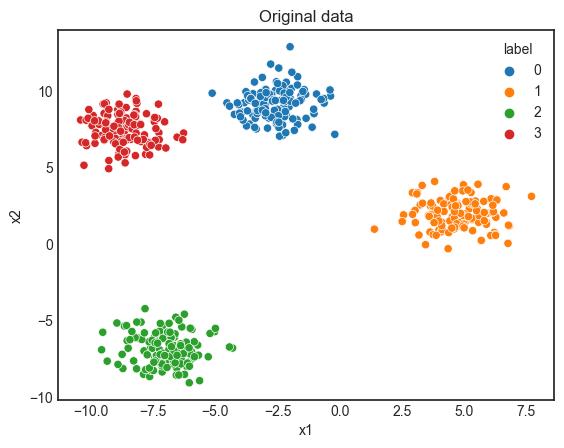

In [32]:
sns.scatterplot(data=df, x="x1", y="x2", hue="label", palette="tab10")
plt.title("Original data");

In [33]:
# we don't have labels in unsupervised learning
# in this simulation we drop the label, but for real world data there is no label in beginning
X = df.drop("label", axis = 1)
X.head()

,x1,x2
0,-7.689054,6.620346
1,-9.576514,-6.934404
2,6.829682,1.164871
3,-2.901306,7.550771
4,-5.678413,-7.288185


---
## Feature scaling

- need to scale dataset with either feature standardization or normalization
- in unsupervised, as there is no label, we can use the whole dataset in scaling
- not train|test split

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X[:5]

array([[-0.81539333,  0.58938951],
       [-1.17344434, -1.55328827],
       [ 1.93881064, -0.27298895],
       [ 0.0928425 ,  0.73646712],
       [-0.43397474, -1.60921239]])

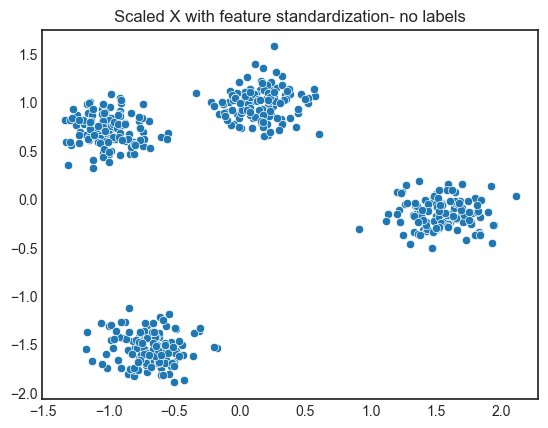

In [35]:
sns.scatterplot(x=scaled_X[:, 0], y=scaled_X[:, 1])
plt.title("Scaled X with feature standardization- no labels");

---
## k-means clustering

- k-means clustering is an unsupervised learning algorithm, which means that there are no labels

1. $k$ number of clusters are chosen
2. $k$ points are randomly selected as cluster centers
3. the nearest points to each cluster center are classified as that cluster
4. the center of the cluster is recalculated
5. repeat 3 and 4 until convergence

note that nearest points are defined by some distance metric

### Choose k

- plot an elbow plot of sum of squared distances (inertia in sklearn) and find the an inflexion point to choose $k$, i.e. the point with significant lower rate of change than before (note that this might be hard to find exact)
- domain skills, it's important to understand your dataset to find an adequate $k$ and also equally important to be able to know what the clusters represent
- note that it is hard to find correct number of clusters, and it is here the art and domain skills become more important


In [36]:
from sklearn.cluster import KMeans

clusters = range(1, 10)
sum_squared_distances = [KMeans(k, n_init='auto').fit(scaled_X).inertia_ for k in clusters]
sum_squared_distances


[999.9999999999992,
 601.265502922938,
 116.09567852755526,
 28.786938978874005,
 26.06021587317813,
 23.478113675364572,
 22.276704104276742,
 19.37085257795621,
 18.21960339217054]

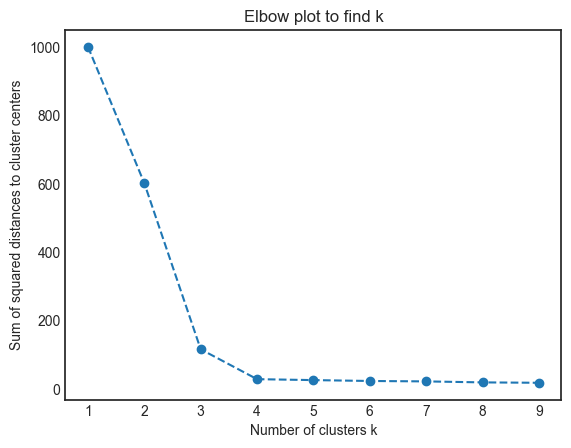

In [37]:
fig, ax = plt.figure(), plt.axes()
ax.plot(clusters, sum_squared_distances, '--o')
ax.set(title="Elbow plot to find k", xlabel="Number of clusters k",
       ylabel="Sum of squared distances to cluster centers");

# note here that it is very hard to pick 3 or 4 clusters as the clusters are close to each other 

In [38]:
# diff() picks difference bwteen 0 and 1 (NaN), 1 and 2, 2 and 3, ....
pd.Series(sum_squared_distances).diff()

# largest difference is from k=2 to k=3 so result is k=3

0           NaN
1   -398.734497
2   -485.169824
3    -87.308740
4     -2.726723
5     -2.582102
6     -1.201410
7     -2.905852
8     -1.151249
dtype: float64

---
## Silhouette score 

Note that it's usually not possible to plot the clusters, instead the silhouette score in combination with elbow plot can help in determining clusters. 

- silhouette score is a measure of cluster tightness

The silhoutte coefficient $S_i$ is calculated as 
$$S_i = \frac{b_i-a_i}{\max{\{a_i, b_i\}}}$$
,where 
- $a_i$ is mean distance between i and other points in the cluster it belongs to
- $b_i$ is the mean distance from i to clusters it doesn't belong to

Calculate average silhouette score for different $k$ clusters in the clustering algorithm, in this case KMeans. 

- silhouette coefficient is between -1 and 1
- value 1 -> very compact clusters
- value 0 -> overlapping clusters
- value -1 -> worst value

In [41]:
from sklearn.metrics import silhouette_score

kmeans = [KMeans(k, n_init = 'auto').fit(scaled_X) for k in clusters]
kmeans

[KMeans(n_clusters=1, n_init='auto'),
 KMeans(n_clusters=2, n_init='auto'),
 KMeans(n_clusters=3, n_init='auto'),
 KMeans(n_clusters=4, n_init='auto'),
 KMeans(n_clusters=5, n_init='auto'),
 KMeans(n_clusters=6, n_init='auto'),
 KMeans(n_clusters=7, n_init='auto'),
 KMeans(n_init='auto'),
 KMeans(n_clusters=9, n_init='auto')]

In [43]:
[silhouette_score(scaled_X, kmean.labels_) for kmean in kmeans[1:]] # start at 2 since 0 or 1 do not make sense

[0.5277907608458084,
 0.7466113868280718,
 0.7979185955370356,
 0.6765844784622255,
 0.5622411042610692,
 0.5462659005353457,
 0.4392713221417729,
 0.4336280912244074]

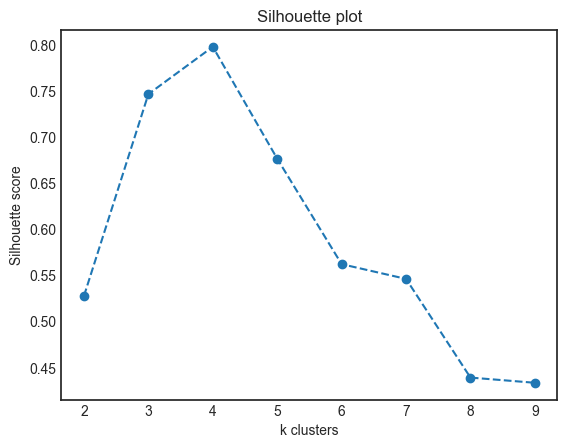

In [45]:
fig, ax = plt.figure(), plt.axes()

silhouette_list = [silhouette_score(scaled_X, kmean.labels_) for kmean in kmeans[1:]]
ax.plot(clusters[1:], silhouette_list, "o--")
ax.set(title = "Silhouette plot", xlabel = "k clusters", ylabel = "Silhouette score");

# best result is for k = 4

---
### Visualization

- note that we don't have the luxury to visualize real world data as dimensions usually are much higher than 2

In [47]:
# df with scaled data and no labels
df_plot = pd.DataFrame(scaled_X, columns=["x1", "x2"])
df_plot.head()

,x1,x2
0,-0.815393,0.589390
1,-1.173444,-1.553288
2,1.938811,-0.272989
3,0.092842,0.736467
4,-0.433975,-1.609212


In [58]:
#[3] corresponds to KMeans(n_clusters=4, n_init='auto') in kmeans
kmeans[3].cluster_centers_, kmeans[3].labels_

(array([[-0.68486276, -1.54855438],
        [ 0.14957993,  0.98016683],
        [ 1.53895017, -0.15301193],
        [-1.00366735,  0.72139948]]),
 array([3, 0, 2, 1, 0, 0, 3, 0, 2, 0, 2, 1, 2, 1, 0, 2, 1, 3, 3, 1, 2, 1,
        2, 3, 3, 0, 0, 3, 3, 1, 0, 1, 1, 1, 0, 0, 2, 2, 3, 3, 0, 2, 1, 1,
        1, 2, 2, 2, 0, 3, 0, 1, 3, 0, 2, 1, 1, 3, 0, 3, 3, 1, 0, 3, 2, 0,
        0, 3, 2, 0, 2, 0, 0, 3, 1, 3, 1, 0, 2, 1, 0, 2, 0, 1, 3, 3, 3, 3,
        2, 1, 3, 0, 2, 0, 2, 3, 1, 2, 1, 3, 2, 2, 2, 3, 3, 1, 1, 3, 1, 3,
        0, 3, 3, 3, 3, 0, 2, 3, 0, 0, 1, 2, 0, 2, 3, 2, 2, 0, 0, 3, 3, 2,
        2, 0, 2, 3, 3, 3, 2, 2, 0, 3, 2, 2, 0, 3, 3, 1, 1, 1, 0, 0, 2, 2,
        1, 3, 1, 3, 0, 0, 3, 3, 2, 2, 0, 1, 2, 0, 3, 3, 0, 1, 1, 3, 3, 1,
        1, 0, 0, 0, 1, 3, 1, 1, 3, 3, 1, 2, 1, 0, 0, 3, 3, 0, 1, 0, 1, 1,
        3, 0, 1, 1, 0, 3, 2, 3, 0, 2, 2, 3, 3, 0, 3, 1, 1, 0, 1, 3, 1, 2,
        2, 1, 3, 1, 2, 1, 1, 0, 0, 2, 0, 2, 1, 0, 3, 0, 1, 0, 2, 2, 2, 0,
        1, 2, 3, 3, 2, 1, 1, 0, 1, 1, 1,

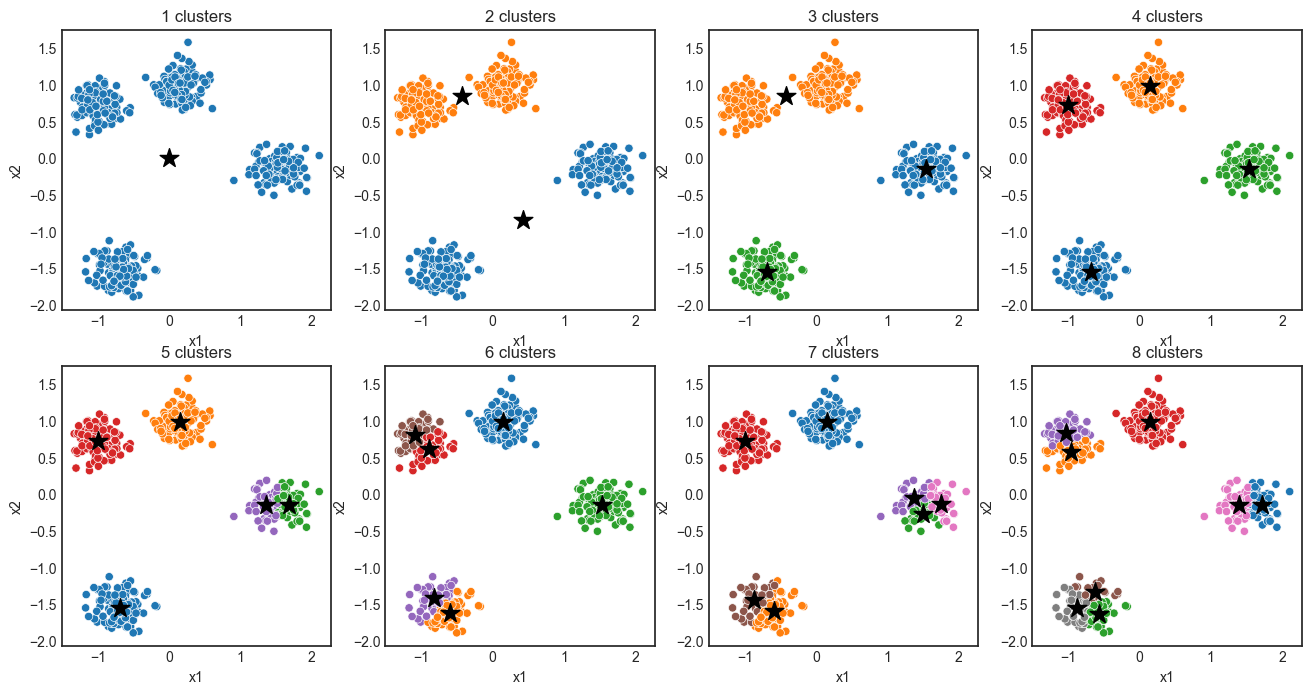

In [61]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i, ax in enumerate(axes.flatten()):
    cluster_centers = kmeans[i].cluster_centers_
    df_plot["label"] = kmeans[i].labels_

    sns.scatterplot(data=df_plot, x="x1", y="x2",hue="label", ax=ax, palette="tab10")
    ax.scatter(x=cluster_centers[:, 0], y=cluster_centers[:, 1], s = 200, marker = '*', color="black", label="centroid")
    ax.legend([],[], frameon = False) # no legend
    ax.set(title = f"{i+1} clusters")


---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---
